In [24]:
# Import packages for executing query 
import matplotlib.pyplot as plt 
from astropy.io import ascii
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from bokeh.plotting import figure 
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

###  For an interactive version of this notebook, please view this in [Nbviewer](https://nbviewer.jupyter.org/github/AndyTza/modern_astro/blob/master/Modern%20Stellar%20Astrophysics%20Homework%201%20Solutions.ipynb)

## __Problem 1__
Type Question here: 


To make our HRD, we first visit the [Gaia Archive](http://gea.esac.esa.int/archive/) where Gaia DR2 is available:

## Query restrictions dowloading the data from ADQL:
 From __Problem 1__ here are the following filters we must apply before querying the data:
 - We __SELECT TOP (100,000)__ sources from Gaiadr2.gaia_source
 - Parallax > 0 (Utilizing only positive parallaxes)
 - Parallax errors < 10 percent (i.e parallax_over_error > 10)
 
    In SQL Query Form: 
        
        SELECT TOP 100000
        parallax, parallax_over_error, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
        FROM gaiadr2.gaia_source 
        WHERE parallax > 0 
        AND parallax_over_error > 10 
 

Once the data is obtained, we now __roughly__ estimate the absolute magnitude ($M_{G}$) for our sources given that we have reliable parllaxes ($\omega$[mas]) where we invert the parallax to obtain distance ($d$ [pc]): 


\begin{equation*}
M_G = G - 5log_{10}{\Bigl({\frac{d}{10}}\Bigr)}
\end{equation*}  

 

In [44]:
data = ascii.read("/Users/iraf1/Downloads/1537317034776O-result.csv")

In [4]:
ch = data['astrometric_chi2_al']

(-5000, 42000)

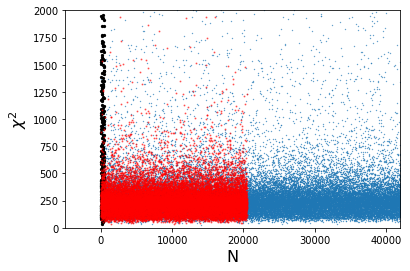

In [103]:
plt.scatter(np.arange(0,len(ch),step=1),ch, s=0.1)
plt.scatter(np.arange(0,len(ch[d_near]),step=1),ch[d_near], s=5, color='k')
plt.scatter(np.arange(0,len(ch[d_far]),step=1),ch[d_far], s=1, color='red', alpha=0.5)

plt.ylim(0,2000)
plt.ylabel('$\chi^{2}$', size=16)
plt.xlabel('N', size=16)
plt.xlim(-5000,42000)

In [110]:
val = ch[d_near]
len(val[val>500])

233

In [73]:
# Define variables for analysis 
parallax = data['parallax'] * 0.001 # convert paralalx to arcseconds
distance = 1/parallax # distance in (pc)
g = data['phot_g_mean_mag']
bp_rp = data['phot_bp_mean_mag'] - data['phot_rp_mean_mag'] 

# Define distance cuts 
d_near = distance<100 # less than 100 pc 
d_far = np.where((distance>2000) & (distance<3000)) # between 2kpc - 3kpc 

# Apply distance modulus to estimate absolute magnitude
Mg_near = g[d_near] - 5*np.log10(distance[d_near]/10) # near cut (<100 pc)
Mg_far = g[d_far] - 5*np.log10(distance[d_far]/10) # far cut (2-3 kpc)
Mg = g - 5*np.log10(distance/10) # all sources

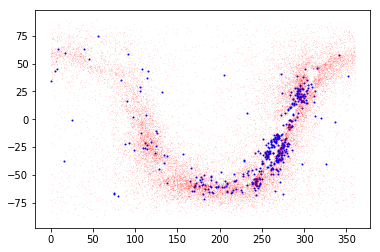

In [110]:
ra, dec = data['ra'], data['dec']

plt.scatter(ra[d_near], dec[d_near], color='blue', s=1)
plt.scatter(ra[d_far], dec[d_far], color='red', s=0.001)


In [87]:
flag = data['astrometric_primary_flag']
flag_true = np.where(flag=='true') # index of true values
flag_false = np.where(flag=='false') # index of valse values 

(19.024011245688463, -4.686615927803021)

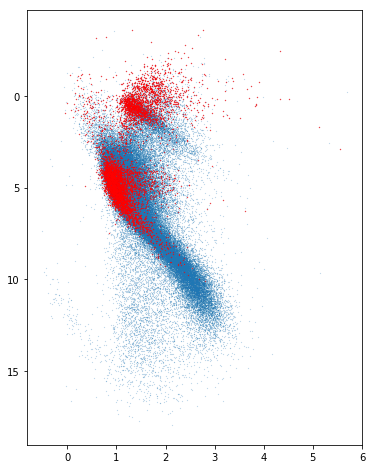

In [107]:
plt.figure(figsize=(6,8))
plt.scatter(bp_rp, Mg, s=0.01)
plt.scatter(bp_rp[flag_true], Mg[flag_true], color='red', s=0.1)

#plt.scatter(bp_rp[d_near], Mg_near, s=0.1)
#plt.scatter(bp_rp[flag_false], Mg[flag_false], color='green', s=0.1)
plt.ylim(plt.ylim()[::-1])

Text(0.5,0,'Distance [pc]')

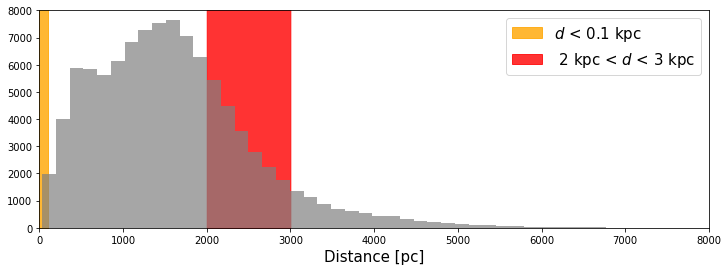

In [41]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
ax.fill_between(np.arange(0,100,step=1),9900, 0, label='$d$ < 0.1 kpc', color='orange',
               alpha=0.8)
ax.fill_between(np.arange(2000,3000,step=1),9900, 0, label=' 2 kpc < $d$ < 3 kpc',
                color='red', alpha=0.8)
ax.set_xlim(0,8000)
ax.set_ylim(0,8000)
ax.hist(distance, bins=50, color='gray', alpha=0.7, label='')
ax.legend(fontsize=15)
ax.set_xlabel('Distance [pc]', size=15)

Text(0,0.5,'$M_{G}$')

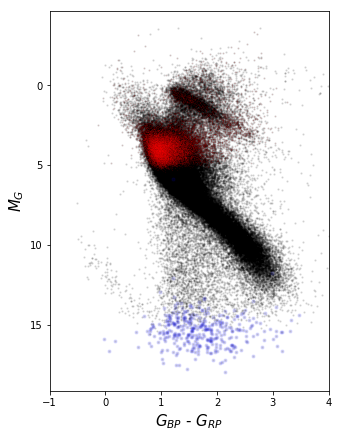

In [42]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
ax.scatter(bp_rp, Mg, s=1.9, color='k', alpha=0.1)
ax.scatter(bp_rp[d_near], Mg_near, s=10, alpha=0.1, color='blue')
ax.scatter(bp_rp[d_far], Mg_far, s=0.1, alpha=0.1, color='red')
ax.set_ylim(ax.set_ylim()[::-1])
ax.set_xlim(-1, 4)
ax.set_xlabel('$G_{BP}$ - $G_{RP}$', size=15)
ax.set_ylabel('$M_{G}$', size=15)

There are two main key dist between the far and close distance cuts suggested. First is that the furthest distance cut (2-3kpc) gives stars that are both bright and have good enough parallaxes -- that lie on the upper left corner of the Main Sequence (MS) and some on the Giant Branch (GB). Such result is intuitive, since our parallax filtering suggests to find stars that are bright enough to have good parallaxes, that are on the upper left part of the MS and giant stars.

The closer distance cut interestingly does not appear to be part of any of the main over-densities of the HRD. This suggest that our closer cut sample (<0.1kpc) contains stars with good enough parallaxes but not as bright as one would expect. Although this would suggest that in the local solar neighbourhood there are not enough of bright stars to be part of the main str
uctures of the HRD, we can also suggest that such issue lies from the sample size of our distance cut. The suggested distance contraints are not equal, thus we can make the general statement that: 


\begin{equation*}
N_{far} > N_{close}
\end{equation*}


This is also seen in the histogram (Fig.1) that the sample size of the smallest distance cut contains much fewer stars than the larger distance cut. Hence, this might also be a key reason why the shortest distance cut does not fall in any obvious structures of the HRD. 


# Problem 2 


Solution: 

   __Part (a): __

   We can utilize the distance luminosity function for a given star with Luminosity (L), distance (R) and Flux (F)

\begin{equation*}
L = \frac{F}{4\pi R^2}
\end{equation*}


   Further, we're also able to relate the Flux of a source by its temeprature using Stefan-Boltzman relation: 

\begin{equation*}
F = \sigma T^4
\end{equation*}


   Given two stars with 
$${(L_1, R_1, T_1)}$$ 
    
$${(L_2, R_2, T_2)}$$

   Their definig relationships can be expressed as following : 


\begin{equation*}
\frac{L_1}{L_2} = \frac{F_1}{4\pi R_{1}^2} \frac{4\pi R_{2}^2}{F_2}
\end{equation*}

   By simiplifying terms we conclude: 
\begin{equation*}
\frac{L_1}{L_2}={\Bigl({\frac{T_1}{T_2}}\Bigr)}^4 {\Bigl({\frac{R_1}{R_2}}\Bigr)}^2 
\end{equation*}
        

   __Part (b):__
    
   We can now derive an approximate radius estimate for Betelgeuse. Given T=3370K and L=72100 Lsolar:
    
\begin{equation*}
\frac{L_B}{L_\odot}={\Bigl({\frac{T_B}{T_\odot}}\Bigr)}^4 {\Bigl({\frac{R_B}{R_\odot}}\Bigr)}^2 
\end{equation*}    
    
   We can now numerically estimate the approximate value of betelgeuse:
    
    
\begin{equation*}
R_B = {\Bigl({\frac{72100*R_\odot^{2}*T_\odot^{4}}{T_B^{4}}}\Bigr)}^{\frac{1}{2}}
\end{equation*}   

Which yields to an estimate of 



\begin{equation*}
R_B = 778 R_\odot
\end{equation*} 



## __ Problem 3__: 

__ Part (a): __


For a log, log plot, we are able to re-arange the Mass (M) and Luminiosity (L) terms:

\begin{equation*}
(X, Y) = log{\Bigl({\frac{M}{M_{\odot}}}\Bigr)},     log{\Bigl({\frac{L}{L{\odot}}}\Bigr)}
\end{equation*} 


\begin{equation*}
log_{10}{\Bigl({\frac{0.1*M_{\odot}}{M_{\odot}}}\Bigr)} = -1
\end{equation*} 

\begin{equation*}
log_{10}{\Bigl({\frac{1*M_{\odot}}{M_{\odot}}}\Bigr)} = 0
\end{equation*} 

\begin{equation*}
log_{10}{\Bigl({\frac{10*M_{\odot}}{M_{\odot}}}\Bigr)} = 1
\end{equation*} 

\begin{equation*}
log_{10}{\Bigl({\frac{30*M_{\odot}}{M_{\odot}}}\Bigr)} = 1.4
\end{equation*} 

\begin{equation*}
log_{10}{\Bigl({\frac{100*M_{\odot}}{M_{\odot}}}\Bigr)} = 2
\end{equation*} 


Thus for each corresponding mass that we find, we can also extrapolate the luminosity by applying the general exponential form: 

\begin{equation*}
L = 10^{-Y} * L\odot
\end{equation*} 

For each corresponding mass, we now compute the luminosity at each point: 

\begin{equation*}
L = [ {10^{-3}}L_{\odot}, 1L_{\odot}, 10^{4}L_{\odot}, 10^{5}L_{\odot}, 10^{7}L_{\odot} ]
\end{equation*} 



__Part (b): __ 

For our given mass and luminosity data points we apply equation


\begin{equation*}
\tau_{MS} = \frac{Q}{4}* f * \frac{M}{m_{H}} * L^{-1}
\end{equation*}

Where we express the units of Q and L in __Joules__ and __Joules/seconds__, and masses in __kilograms__. We estimate for the given mass and luminosity of each extrapolated point: 

\begin{equation*}
\tau_{MS} = [1.47 x 10^3, 2.94, 1.47x10^{-2}, 4.41 x 10^{-3},
       1.47 x 10^{-4}]  Gyr
\end{equation*}


__Part (c): __ 

The main difference between low and high mass stars is in life-time on the Main Sequence. As shown in Fig.3, we conclude that _high__ mass stars will remain on the MS for a shorter time versus the low mass stars. In fact, our rough estimations suggest that very low mass stars can exceed the age of the universe.

In [114]:
# Data-points obtained by Figure 1 from HW #1
M_data = np.array([0.1, 1, 10, 30, 100]) # times solar mass
L_data = np.array([0.001, 1, 10**4, 10**5, 10**7]) # times solar luminosity 

def luma(mass, units='Joules'):
    """Esimation of luminosity of a given star for a given mass in the Main Sequence.
    
       Parameters
       ----------
       mass: Mass of star in solar units (float)
       units: return units in either Solar or Joules/second (str)
    """
    if units=='Joules':
        L = (mass)**(3.5) * (3.848*10**26) # J/s
    elif units=='Solar': 
        L = (mass)**(3.5) # Solar units
    
    return L

def t_ms(mass, luminosity, f=0.15, q_factor=1.001e-12, m_h=1.674e-27, time_units='mega'): 
    "Return the life-time of main-sequence star for given f, Q factors"
    
    if time_units=='mega':
        time = (q_factor*f*mass*1.99e30)/(m_h*luminosity*3.848e26) # sec
        time = time * 3.171e-14 #Myr 
    elif time_units=='giga':
        time = (q_factor*f*mass*1.99e30)/(m_h*luminosity*3.848e26) # sec
        time = time * 3.171e-17 #Gyr 
        
    return time    

# Create mock mass and luminosity for distribution
M_mock = np.linspace(0.1, 100, num=230)
L_mock = luma(M_mock, units='Solar')

time_mock = t_ms(M_mock, L_mock, time_units='giga')
time_data = t_ms(M_data, L_data, time_units='giga' )

In [115]:
time_data

array([1.47090335e+03, 1.47090335e+01, 1.47090335e-02, 4.41271006e-03,
       1.47090335e-04])

## Figure 3

In [113]:
# Interactive plot

p = figure(width=700, height=400, x_axis_label='M/M⊙', y_axis_label='time [Gyr]',
          title='Figure 3. Mass-time functions of extrapolated data')

# Life-time MS for a distribution
p.circle_cross(M_mock,time_mock, color="red", size=10, alpha=0.05) 
p.cross(M_data, time_data, color="black", size=20, alpha=1) 
show(p)